In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hansenhandler import HansenHandler as hh
import os

In [2]:
df = pd.read_csv("data/clean/hansen.csv", index_col=0)
df

,code,tropics,country,year,area,pixels,pixels_sub_25,treecover_2000,treecover_loss,cover_cat_max,cover_2000,loss,sub_25_cover_pct
0,ABW,True,Aruba,2001,178.390664,237371.0,9953.0,0.667005,0.000000,250,0.126387,0.000000,4.193014
1,ABW,True,Aruba,2002,178.390664,237371.0,9953.0,0.667005,0.004013,250,0.126387,0.004013,4.193014
2,ABW,True,Aruba,2003,178.390664,237371.0,9953.0,0.667005,0.006787,250,0.126387,0.006419,4.193014
3,ABW,True,Aruba,2004,178.390664,237371.0,9953.0,0.667005,0.000000,250,0.126387,0.000000,4.193014
4,ABW,True,Aruba,2005,178.390664,237371.0,9953.0,0.667005,0.000000,250,0.126387,0.000000,4.193014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,ZWE,True,Zimbabwe,2016,386974.910945,531493518.0,421580268.0,40169.576222,87.333174,250,1928.975666,43.054181,79.319927
5036,ZWE,True,Zimbabwe,2017,386974.910945,531493518.0,421580268.0,40169.576222,217.053701,250,1928.975666,110.233837,79.319927
5037,ZWE,True,Zimbabwe,2018,386974.910945,531493518.0,421580268.0,40169.576222,60.680794,250,1928.975666,22.014267,79.319927
5038,ZWE,True,Zimbabwe,2019,386974.910945,531493518.0,421580268.0,40169.576222,92.341897,250,1928.975666,46.772500,79.319927


In [3]:
# # From table in paper
# trends = pd.read_csv("data/raw/hansen-song_trends.csv",index_col=0)

In [4]:
# # To compare against hansen-song trends
# (
#     df
#         .query("year < 2013")
#         .groupby(["tropics"])
#         .agg(np.sum)
#         .reset_index()
#         .assign(
#             loss=lambda x: x.loss / 10**6,
#             tree = lambda x: x.treecover_loss / 10**6)
# )

,tropics,year,area,pixels,pixels_sub_25,treecover_2000,treecover_loss,cover_cat_max,cover_2000,loss,sub_25_cover_pct,tree
0,False,2865282,8.575463e+08,1.680823e+12,8.154312e+10,1.665612e+08,804729.043777,357000,1.438713e+08,0.744840,7603.391461,0.804729
1,True,3202374,5.789130e+08,7.747802e+11,1.261359e+11,2.005267e+08,827337.961569,399000,1.717090e+08,0.769644,27050.290086,0.827338


In [12]:
(
    df.query("tropics == True")
            .groupby("country")
            .agg(np.sum)
            .sort_values("loss", ascending=False)
)

,tropics,year,area,pixels,pixels_sub_25,treecover_2000,treecover_loss,cover_cat_max,cover_2000,loss,sub_25_cover_pct
country,,,,,,,,,,,
Brazil,20,40210,1.560695e+08,2.069202e+11,1.000546e+10,9.019801e+07,495603.385653,5000,8.554635e+07,469179.567347,96.708388
Indonesia,20,40210,3.742392e+07,4.876075e+10,1.268139e+09,2.881644e+07,246480.028828,5000,2.814950e+07,243535.839534,52.014737
DRC,20,40210,4.577951e+07,5.975060e+10,4.481643e+09,3.270998e+07,133984.775383,5000,2.843636e+07,128717.035858,150.011640
Malaysia,20,40210,6.552209e+06,8.537867e+09,9.311606e+07,5.378199e+06,76141.539860,5000,5.324452e+06,75673.881969,21.812487
Bolivia,20,40210,2.149565e+07,2.918224e+10,6.724337e+08,1.100049e+07,52122.587510,5000,1.029746e+07,50444.193507,46.085132
...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,20,40210,4.244272e+05,5.986389e+08,1.100000e+03,7.797162e-03,0.000000,5000,0.000000e+00,0.000000,0.003675
Oman,20,40210,5.668411e+06,7.845704e+09,7.876540e+06,3.278377e+02,0.020945,5000,2.596166e-02,0.000000,2.007861
Saudi Arabia,20,40210,1.814370e+07,2.519411e+10,2.658240e+06,6.236698e+01,0.000125,5000,0.000000e+00,0.000000,0.211021


In [2]:
cancer = 23.4394
capricorn = -23.4394

def ilat(lat):
    return round((10 - lat % 10) * 4000) - 1

In [12]:
for measure in ["cover", "loss", "mask"]:
    b = None

    for lat in range(-20,40,10):
        a = np.load(f"interim/{lat}_-180{measure}.npy")[0]
        for i in range(-170,180,10):
            a = np.hstack([a, np.load(f"interim/{lat}_{i}{measure}.npy")[0]])
        
        b = a if b is None else np.vstack([a,b])

    print(b.shape)
    np.save(f"interim/{measure}_tropics.npy", b)

(1200, 7200)
(1200, 7200)
(1200, 7200)


In [137]:
hs = pd.read_csv("data/raw/hsong_countries.csv",index_col=0)

Text(0.5, 0, 'Year')

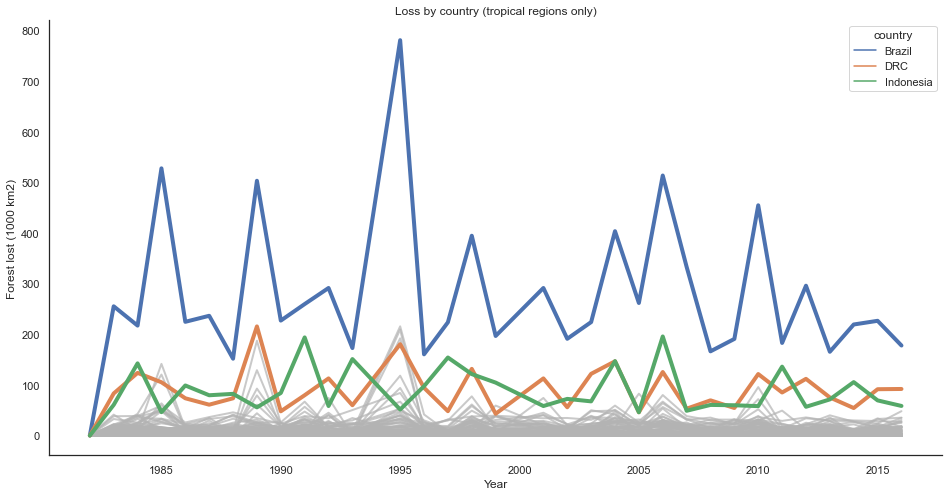

In [155]:
# hsong = (
#     hs
#         .assign(
#             yearly_loss = lambda x: x.gross_loss / 34,
#             **{f"loss_{year}":lambda x: x.yearly_loss for year in range(1983,2001)},
#         )
#         .pipe(pd.wide_to_long, stubnames="loss", sep="_", i=["tropics"], j="year")
#         .reset_index()
#         .loc[:,["tropics","year","loss"]]
# )

tg = (
    pd.read_csv("data/clean/hansen-song.csv",index_col=0)
      .query("tropics == True")
        .assign(
            loss = lambda x: x.loss / 10**3,
        )
)

tg_top = tg.query("code in ['COD','BRA','IDN']")

x = "year"
y = "loss"
group = "country"

f, ax = plt.subplots(figsize=(16, 8))

# # Plot each year's time series in its own facet
sns.set_theme()
sns.set_style("white")
sns.despine()

for c,d in tg.groupby('country'):
    sns.lineplot(
        data=d,
        x=x, y=y, color=".7", alpha=.7,
        linewidth=2,
        legend=False, ax=ax
    )

sns.lineplot(
    data=tg_top,
    x=x, y=y, hue=group,
    linewidth=4,
    legend=True, ax=ax
)

ax.set_title("Loss by country (tropical regions only)")
ax.set_ylabel("Forest lost (1000 km2)")
ax.set_xlabel("Year")
# ax.set_xticks(range(2000,2021,2))

In [ ]:
# hsong = (
#     trends
#         .query("area != 'global'")
#         .assign(
#             yearly_loss = lambda x: x.gross_loss / 34,
#             **{f"loss_{year}":lambda x: x.yearly_loss for year in range(1983,2001)},
#             tropics = lambda x: np.where(x.tropics, "Tropics", "Non-Tropics")
#         )
#         .pipe(pd.wide_to_long, stubnames="loss", sep="_", i=["tropics"], j="year")
#         .reset_index()
#         .loc[:,["tropics","year","loss"]]
# )

# sns.lineplot(
#     data=hsong,
#     x=x, y=y, hue=group, linestyle="--",
#     linewidth=4,
#     legend=False, ax=ax
# )